In [ ]:
pip install fooof

In [ ]:
pip install heatmapz

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

In [ ]:
import numpy as np
from scipy.io import loadmat, savemat
import glob
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from fooof import FOOOF
from fooof.bands import Bands
from fooof.sim.params import param_sampler
from fooof.sim.gen import gen_group_power_spectra
from fooof.sim.utils import set_random_seed
from fooof.analysis import get_band_peak_fm, get_band_peak_fg
from fooof import FOOOFGroup
from fooof.plts.annotate import plot_annotated_model
from fooof.plts.periodic import plot_peak_fits, plot_peak_params
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits
from fooof.utils.reports import methods_report_info
import numbers

In [ ]:
# The first step is to load the power spectrum in two dimensions - one axis must contain the frequencies (for example from 0 to 30 every 0.5 Hz) and the other
# axis must contain the averaged powers of each electrode (obtained by applying the Fourier transform). The arrays must coincide. Lone PSD analysis.

data = loadmat('/content/drive/MyDrive/fooof/pirmas_powerintas.mat')

# Unpack data from dictionary, and squeeze numpy arrays
freqs = np.squeeze(data['freq'])
psd = np.squeeze(data['power'])

In [ ]:
fm = FOOOF()
fm.report(freqs, psd, [0, 61])

In [ ]:
# Extract FOOOF results from object
fooof_results = fm.get_results()

# Convert FOOOF results to a dictionary
#  This is useful for saving out as a mat file
fooof_results_dict = fooof_results._asdict()

In [ ]:
# Save FOOOF results out to a mat file
savemat('/content/drive/MyDrive/igb/fooof_results.mat', fooof_results_dict)

In [ ]:
# Power spectral density parameters:
print('Frequency Range: \t', fm.freq_range)
print('Frequency Resolution: \t', fm.freq_res)
print('Frequency Values: \t', fm.freqs[0:5])
print('Power Values: \t\t', fm.power_spectrum[0:5])

In [ ]:
# Print out model fit results
print('aperiodic params: \t', fm.aperiodic_params_)
#
# Aperiodic parameters: Offset (OFF), Knee (KNE) ir Exponent (EXP).
#
print('peak params: \t', fm.peak_params_)
print('r-squared: \t', fm.r_squared_)
print('fit error: \t', fm.error_)
print('fooofed spectrum: \t', fm.fooofed_spectrum_[0:5])
print('n peaks: \t', fm.n_peaks_)

In [ ]:
# Power spectral density with aperiodic parameters plotted - OFF ir EXP.
modelis = plot_annotated_model(fm, plt_log=False)
modelis

[[0.90200495 1.4529313 ]
 [0.76535004 1.24265334]
 [0.66626169 1.13653324]
 [1.08802307 1.21116743]
 [0.8994915  1.34446002]
 [1.08419327 1.31944991]
 [0.74124493 1.47042908]
 [0.43771512 1.11663262]
 [0.98248916 1.1873317 ]
 [0.80631156 1.23905162]
 [0.86683389 1.04258479]
 [1.38505594 1.36516098]
 [0.96617722 1.29607017]
 [0.83175184 1.09669882]
 [1.06687668 1.50478367]
 [0.85269992 1.17284264]
 [1.40174303 1.41076757]
 [0.77116287 1.07824346]
 [0.73503011 0.95071897]
 [1.13240765 1.24835508]
 [1.16011365 1.21550144]
 [1.14375327 1.18061857]
 [0.9236738  1.25563766]
 [1.05266751 1.13637581]
 [1.12651474 1.33067778]
 [0.74195484 1.30431847]
 [0.89852229 1.27278764]
 [1.25812016 1.1949699 ]
 [0.7809614  1.03017873]
 [0.80096509 1.18302965]
 [0.66311948 1.19068933]
 [0.76780723 1.02199551]
 [1.18346605 1.33679336]
 [0.76724068 1.26244324]
 [1.34761549 1.29522196]
 [0.67404192 1.10052322]
 [1.10252014 1.45939251]
 [1.10432541 1.38319168]
 [0.91517606 1.27415534]
 [0.89033381 1.28526173]


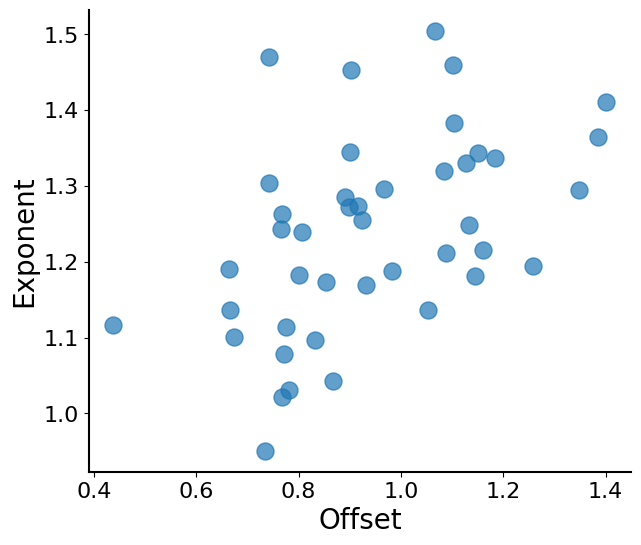

In [ ]:
# Representation of all the aperiodic components under study
aps1 = fg.get_params('aperiodic_params')
plot_aperiodic_params(aps1)
print(aps1)

In [ ]:
aperiodiniai = pd.DataFrame(aps1)
print(aperiodiniai)

In [ ]:
# Save aperiodic parameters of all patients
aperiodiniai.to_csv('/content/drive/MyDrive/fooof/off ir exp.csv')

In [ ]:
# Save all alpha center frequencies of all patients
alphas = get_band_peak_fg(fg, bands.alpha)
alphasdf = pd.DataFrame(alphas)
alphasdf.to_csv('/content/drive/MyDrive/powerinta data/alpha center frequencies.csv')

/usr/local/lib/python3.10/dist-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


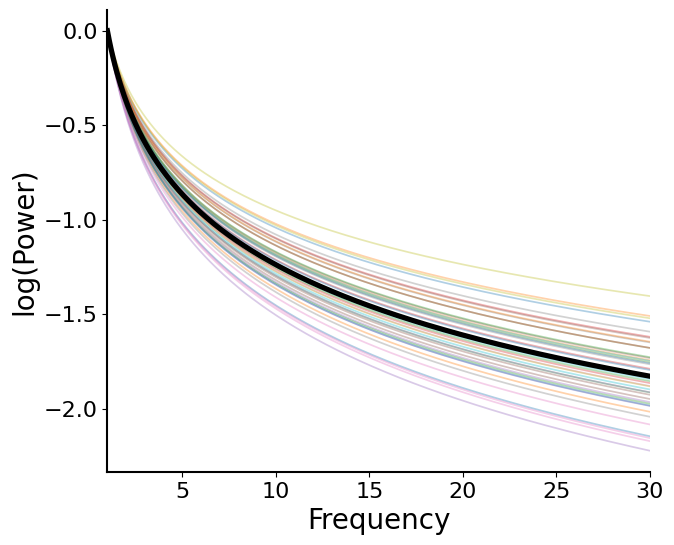

In [ ]:
# Representing aperiodic fits of all patients
freq_range = [1, 30]
plot_aperiodic_fits(aps1, freq_range, control_offset=True, log_freqs=False)

In [ ]:
fm.save_report('FOOOF_report', '/content/drive/MyDrive/igb')

In [ ]:
# Creating frequency bands
bands = Bands({'delta' : [0, 4],
               'theta' : [4, 8],
               'alpha' : [8, 15],
               'beta' : [15, 30],
               'gamma': [30, 100]})

In [ ]:
# Center Frequency (CF)
# The peak frequency of identified peaks. The CF is a peak parameter, as part of the periodic component of the data.
#
# Power (PW)
# The power, over and above the aperiodic component, of identified peaks.
# The PW is a peak parameter, as part of the periodic component of the data.
#
# Bandwidth (BW)
# The bandwidth of identified peaks. The BW is a peak parameter, as part of the periodic component of the data.
#
alpha = get_band_peak_fm(fm, bands.alpha)
print(alpha)

[10.22044221  0.88053635  1.94282358]


In [ ]:
# Multi power spectral density analysis - create an array with all patients average electrode powers and frequencies.

data = loadmat('/content/drive/MyDrive/fooof/visu poweriai powerinti.mat')

# Unpack data from dictionary, and squeeze numpy arrays
freqs = np.squeeze(data['freq']).astype('float')
psds = np.squeeze(data['power']).astype('float')

In [ ]:
fg = FOOOFGroup()

Running FOOOFGroup across 43 power spectra.

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.



/usr/local/lib/python3.10/dist-packages/fooof/objs/group.py:378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  out = np.array([np.insert(getattr(data, name), 3, index, axis=1)


                                                                                                  
                                       FOOOF - GROUP RESULTS                                      
                                                                                                  
                             Number of power spectra in the Group: 43                             
                                                                                                  
                        The model was run on the frequency range 1 - 30 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                              Power spectra were fit without a knee.                              
                                                                                                  
          

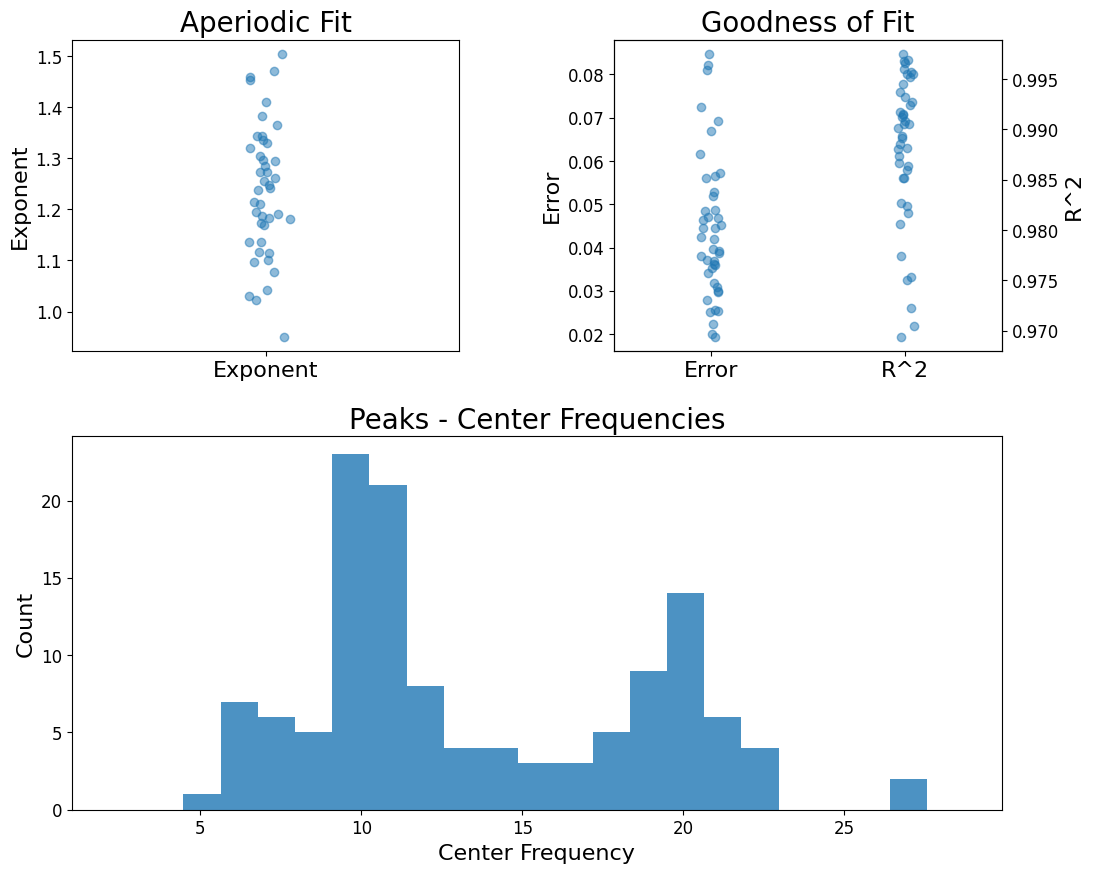

In [ ]:
fg.report(freqs, psds, [1, 100])

In [ ]:
# It is possible to store a specific FOOOF measure that we are interested in, e.g. slope
exps = fg.get_params('aperiodic_params', 'exponent')
savemat('exps.mat', {'exps' : exps})

In [ ]:
methods_report_info(fg)

In [ ]:
r2s = pd.DataFrame(fg.get_params('r_squared'))
print(r2s)
r2s.to_csv('/content/drive/MyDrive/powerinta data/r_squared.csv')

           0
0   0.995458
1   0.993198
2   0.990498
3   0.989148
4   0.986639
5   0.975023
6   0.995239
7   0.982664
8   0.996874
9   0.991678
10  0.991205
11  0.980602
12  0.996606
13  0.975298
14  0.992713
15  0.996019
16  0.970433
17  0.986403
18  0.987392
19  0.988497
20  0.972273
21  0.990809
22  0.985162
23  0.992400
24  0.985141
25  0.995748
26  0.985934
27  0.990534
28  0.969387
29  0.988162
30  0.996777
31  0.981719
32  0.995466
33  0.989327
34  0.990152
35  0.988024
36  0.991566
37  0.997501
38  0.994555
39  0.982419
40  0.993751
41  0.991440
42  0.977412


In [ ]:
expas = pd.DataFrame(fg.get_params('aperiodic_params', 'offset'))
print(expas)
expas.to_csv('/content/drive/MyDrive/powerinta data/offset.csv')

           0
0   0.902005
1   0.765350
2   0.666262
3   1.088023
4   0.899492
5   1.084193
6   0.741245
7   0.437715
8   0.982489
9   0.806312
10  0.866834
11  1.385056
12  0.966177
13  0.831752
14  1.066877
15  0.852700
16  1.401743
17  0.771163
18  0.735030
19  1.132408
20  1.160114
21  1.143753
22  0.923674
23  1.052668
24  1.126515
25  0.741955
26  0.898522
27  1.258120
28  0.780961
29  0.800965
30  0.663119
31  0.767807
32  1.183466
33  0.767241
34  1.347615
35  0.674042
36  1.102520
37  1.104325
38  0.915176
39  0.890334
40  1.151471
41  0.774752
42  0.931344


In [ ]:
# Power points for individual subjects - csv files. Transpose, Lone PSD for analysis.
os.chdir('/content/drive/MyDrive/power exceliai')
extension = 'csv'
allfilenames = [i for i in glob.glob('*.{}'.format(extension))]
df = pd.concat([pd.read_csv(f) for f in allfilenames], axis = 1)
dff = df.loc[:, df.columns!='Hz\subj']
dff

In [ ]:
pirmas = pirmas[:-1]
pirmas

In [ ]:
antras = pirmas.groupby(by=pirmas.columns, axis=1).apply(lambda g: g.mean(axis=1) if isinstance(g.iloc[0,0], numbers.Number) else g.iloc[:,0])

In [ ]:
trecias = np.square(antras)

In [ ]:
ketvirtas = np.transpose(trecias)

In [ ]:
ketvirtas.to_csv('/content/drive/MyDrive/fooof/visu_poweriai_powerinti.csv')

In [ ]:
arsq = pd.read_excel('/content/drive/MyDrive/fooof/arsq ir parametrai be out powerinti.xlsx', sheet_name = "Sheet1")
df_arsq_subject = pd.DataFrame(arsq)
df_arsq = df_arsq_subject.drop(df_arsq_subject.iloc[:, 0:1],axis = 1)
df_arsq

,DoM,ToM,Self,Plan,Sleep,Comfort,SA,Health,Visual,Verbal,OFF,expas,alpha_CF,alpha_PW,alpha_BW,beta_CF,beta_PW,beta_BW
0,4.33,3.33,3.67,3.00,1.33,4.00,5.00,2.00,5.00,4.33,0.902005,1.452931,10.224167,1.757489,1.930371,20.559539,0.608194,2.485414
1,2.33,2.67,2.33,1.33,2.33,4.00,3.67,2.33,4.67,1.67,0.765350,1.242653,14.208588,0.355444,3.349924,20.760208,0.209332,4.626615
2,3.00,2.33,3.00,2.67,4.00,3.67,2.67,2.33,3.00,2.33,0.666262,1.136533,9.593873,0.437300,1.769764,18.772068,0.620233,3.491592
3,4.67,3.67,5.00,2.33,3.00,5.00,2.33,2.00,5.00,2.33,1.088023,1.211167,10.036562,1.532640,2.673375,19.299701,0.452860,4.212518
4,1.67,1.67,3.67,3.33,3.00,2.67,4.33,2.00,2.00,3.67,0.899492,1.344460,10.060800,1.553543,2.263227,19.421555,0.387519,2.381230
5,3.67,3.00,2.33,4.33,2.33,3.67,4.00,2.00,4.00,1.33,1.084193,1.319450,10.627917,1.346901,1.260835,NaN,NaN,NaN
6,3.00,3.00,4.33,3.00,4.67,4.00,4.33,2.33,3.67,4.67,0.741245,1.470429,10.325360,0.773392,2.167555,19.774086,0.247341,3.921784
7,3.67,2.33,3.00,4.00,2.00,4.00,3.00,2.00,1.00,5.00,0.437715,1.116633,10.690580,0.297664,1.720544,20.086037,0.156041,4.629459
8,5.00,2.67,2.67,2.00,4.00,4.00,3.33,1.00,4.33,3.00,0.982489,1.187332,9.133673,0.218032,4.537193,15.254156,0.105460,0.994978
9,2.00,1.33,1.67,3.00,2.00,4.67,2.33,1.00,2.00,1.33,0.806312,1.239052,10.102337,1.066092,2.335079,20.382353,0.219960,3.393042
